<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

# Lab: Logistic Regression

## Learning Objectives
By the end of this lab, you will be able to:
- Understand the difference between linear and logistic regression
- Implement binary logistic regression for classification tasks
- Visualize decision boundaries and model performance
- Evaluate classification models using appropriate metrics
- Use validation sets for feature selection and regularization tuning
- Extend logistic regression to multi-class problems

## Introduction

While linear regression predicts continuous values, **logistic regression** is used for **classification** - predicting discrete categories. Despite its name, logistic regression is a classification algorithm!

The key difference is that logistic regression uses the **sigmoid function** (also called the logistic function) to map predictions to probabilities between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

In [167]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Set random seed for reproducibility
np.random.seed(42) # makes the random numbers predictable

# Set plot style
plt.rcParams['figure.figsize'] = (10, 6)

## Part 1: Understanding the Sigmoid Function

Let's start by visualizing the sigmoid function to understand how it transforms linear predictions into probabilities.

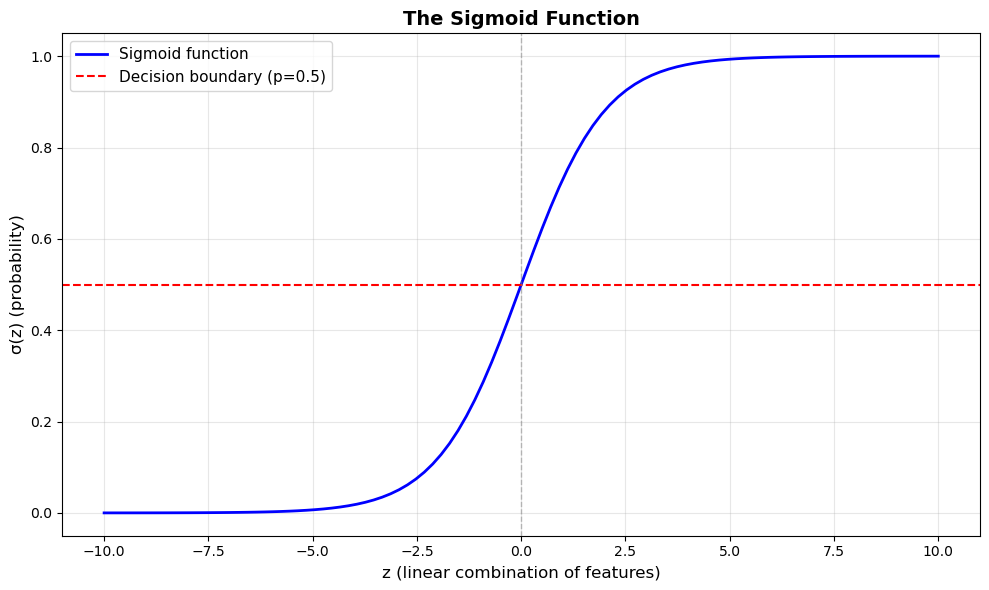

Key observations:
- When z = 0, σ(z) = 0.500
- When z → -∞, σ(z) → 0
- When z → +∞, σ(z) → 1
- The function is always between 0 and 1, making it perfect for probabilities!


In [168]:
def sigmoid(z):
    """Compute the sigmoid function
        - Purpose: Convert any real number into a probability between 0 and 1.
    """
    return 1 / (1 + np.exp(-z)) # with the formula

# Create a range of values
z = np.linspace(-10, 10, 100) # creates a range of possible raw scores so you can see how the sigmoid behaves.

# converts each z value into a probability:
# - Large negative z → probability near 0
# - Large positive z → probability near 1
# This is why the curve is S‑shaped.
y = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z, y, 'b-', linewidth=2, label='Sigmoid function')

# Decision boundary = 0.5 where probability = 0.5, This happens exactly when z = 0.
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=1.5, label='Decision boundary (p=0.5)') # A decision boundary is the rule a model uses to decide which class a data point belongs to.
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=1)
plt.xlabel('z (linear combination of features)', fontsize=12)
plt.ylabel('σ(z) (probability)', fontsize=12)
plt.title('The Sigmoid Function', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("Key observations:")
print(f"- When z = 0, σ(z) = {sigmoid(0):.3f}")
print(f"- When z → -∞, σ(z) → 0")
print(f"- When z → +∞, σ(z) → 1")
print(f"- The function is always between 0 and 1, making it perfect for probabilities!")

## Part 2: Binary Classification Example, Space Shuttle

The goal is to show how logistic regression can help make decisions when outcomes are binary:
* 0 = No O‑ring failure
* 1 = O‑ring failure

From http://www.edwardtufte.com/tufte/ebooks, in "Visual and Statistical Thinking: 
Displays of Evidence for Making Decisions":

This example is famous because it shows how data visualization and statistical thinking could have prevented a tragedy.
>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

But they did not make their case persuasively, and were over-ruled by NASA.

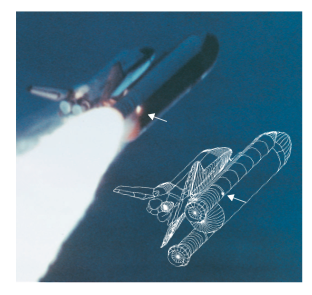

In [169]:
from IPython.display import Image as Im
from IPython.display import display
Im('shuttle.png')

The image above shows the leak, where the O-ring failed.

We have here data on previous failures of the O-rings at various temperatures (loading the file chall.txt)


In [170]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("chall.txt")])
data # The temperature at launch & Whether the O‑rings failed or not

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

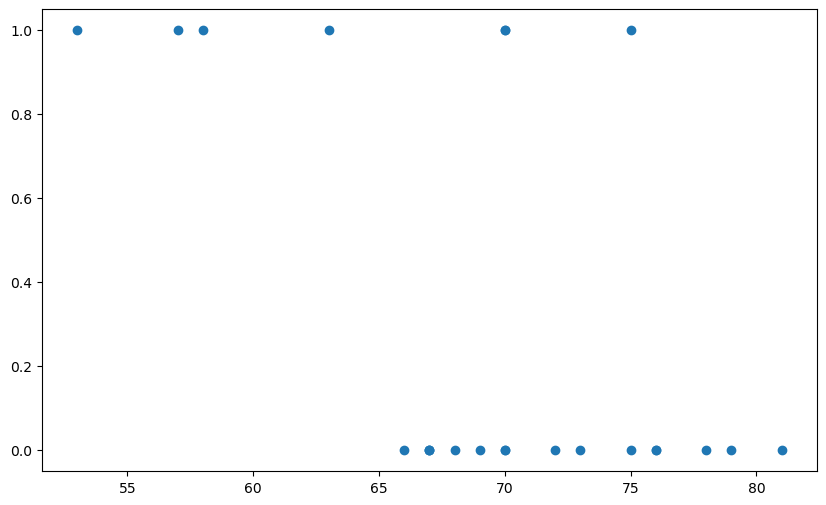

In [171]:
dat = pd.DataFrame(data, columns = ['Temp', 'Failure'])
plt.scatter(dat["Temp"],dat["Failure"])

### Let's see if we can come up with a model for this

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
model = LogisticRegression()

In [174]:
X = dat["Temp"].values
y = dat["Failure"].values
y

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [175]:
model.fit(X.reshape(-1,1),y) # scikit‑learn expects X to be 2‑dimensional, even if you only have one feature.

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


model.score will give us the accuracy, this will be on the training data, no validation

In [176]:
model.score(X.reshape(-1,1),y) # This evaluates the model’s accuracy on the training data.
# Basically means: How well does the trained model predict the correct labels on this dataset?
# Accuracy = number of correct predictions / total predictions
# So if the model got 17 out of 20 points correct: 0.85

0.8695652173913043

### Now let's plot the graph of predictions

linspace gives us all the x's we need, we make the y predictions based on this and the plot should show the picture

#### First diagram: loading the Challenger O‑ring data

(-0.1, 1.1)

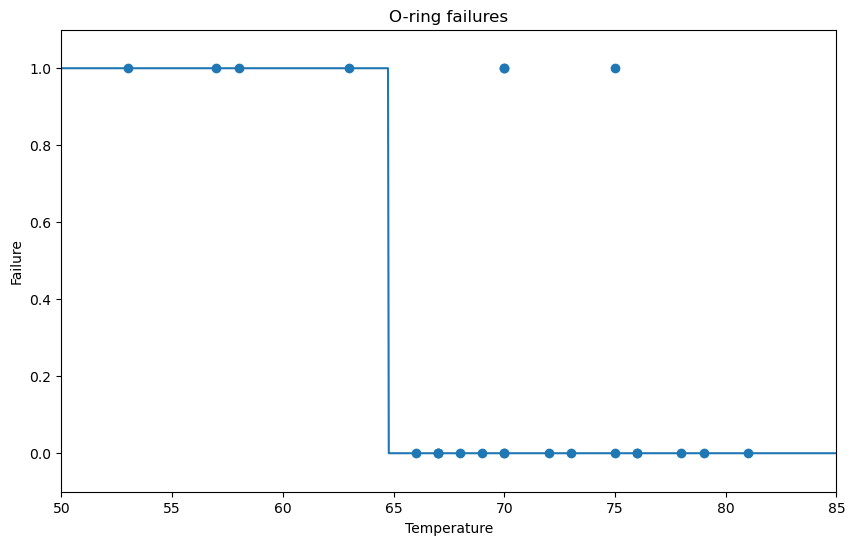

In [177]:
x = np.linspace(50, 85, 1000)
y_pred = model.predict(x.reshape(-1,1))
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_pred)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

#Something very wrong in this picture! - the plot looks like a flat step function, not a smooth S‑curve.

That's not what logistic regression should look!

model.predict only predicts 1 or 0, it does not give in between "probabilities" like we need

#### Second diagram: the WRONG logistic regression plot


(-0.1, 1.1)

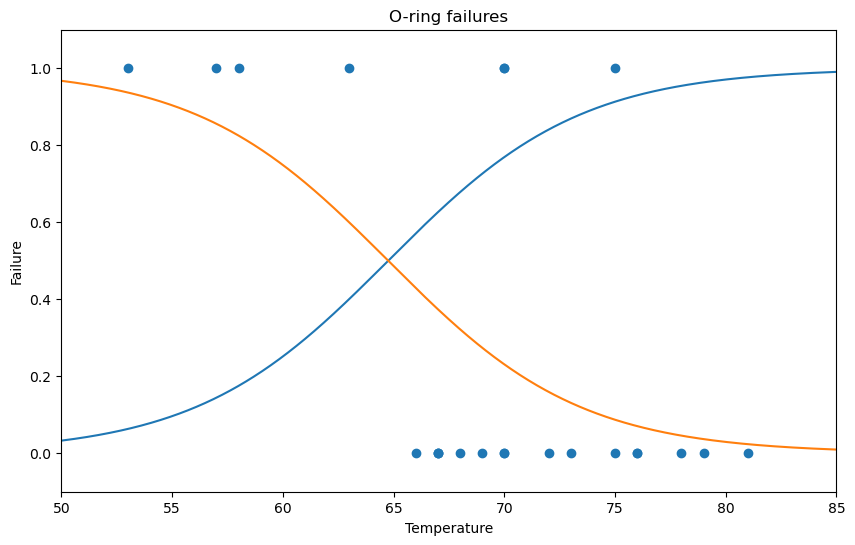

In [178]:
x = np.linspace(50, 85, 1000)
y_predprob = model.predict_proba(x.reshape(-1,1))
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

#Something very wrong in this picture!

It gives two plots. That is because if you look at y_predprob you have two things

In [179]:
y_predprob[0]

array([0.03270804, 0.96729196])

The first one is the probability for 0 while the second one is the probability for 1. Now only plot one

#### Third Diagram: the CORRECT logistic regression probability curve

(-0.1, 1.1)

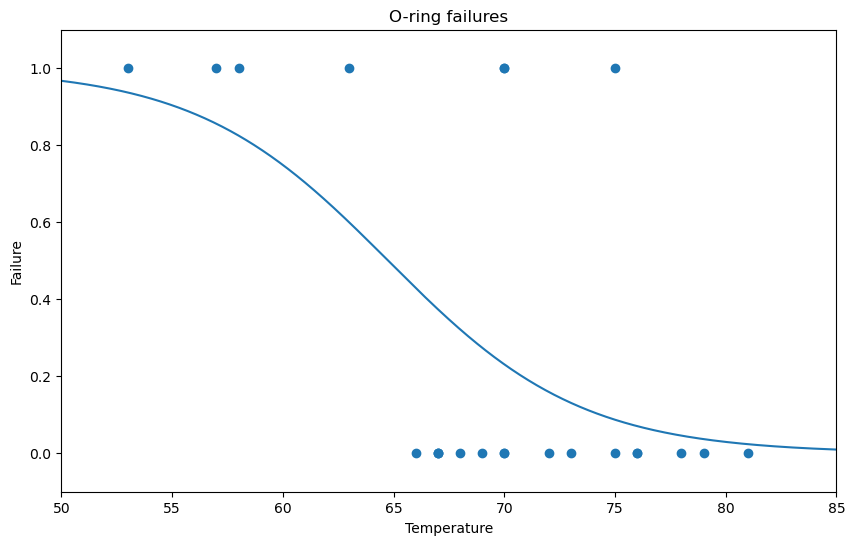

In [180]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob[:,1])

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

## Part 3: Binary Classification - Heart Disease Prediction

### 3.1 Load and Explore the Data

We'll work with a heart disease dataset that contains information about patients and whether they have heart disease.

In [181]:
# Load the dataset
df = pd.read_csv('heart_disease.csv')
# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())
print("\nClass distribution:")
print(df['heart_disease'].value_counts())

Dataset shape: (500, 7)

First few rows:
   age  cholesterol  blood_pressure  max_heart_rate  exercise_hours   bmi  \
0   68          325             159             115             7.4  28.5   
1   58          234             159             170             8.7  37.7   
2   44          188              93             116             4.3  25.1   
3   72          249             164             122             0.4  20.8   
4   37          182             151             125             1.6  28.4   

   heart_disease  
0              1  
1              0  
2              0  
3              0  
4              0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             500 non-null    int64  
 1   cholesterol     500 non-null    int64  
 2   blood_pressure  500 non-null    int64  
 3   max_heart_rate  500 non-null    i

**YOUR CODE HERE**: Create a visualization to explore the relationship between features and the target variable. 

Hint: Create a 2x3 subplot showing how each feature relates to heart disease. You could use histograms, box plots, or scatter plots.

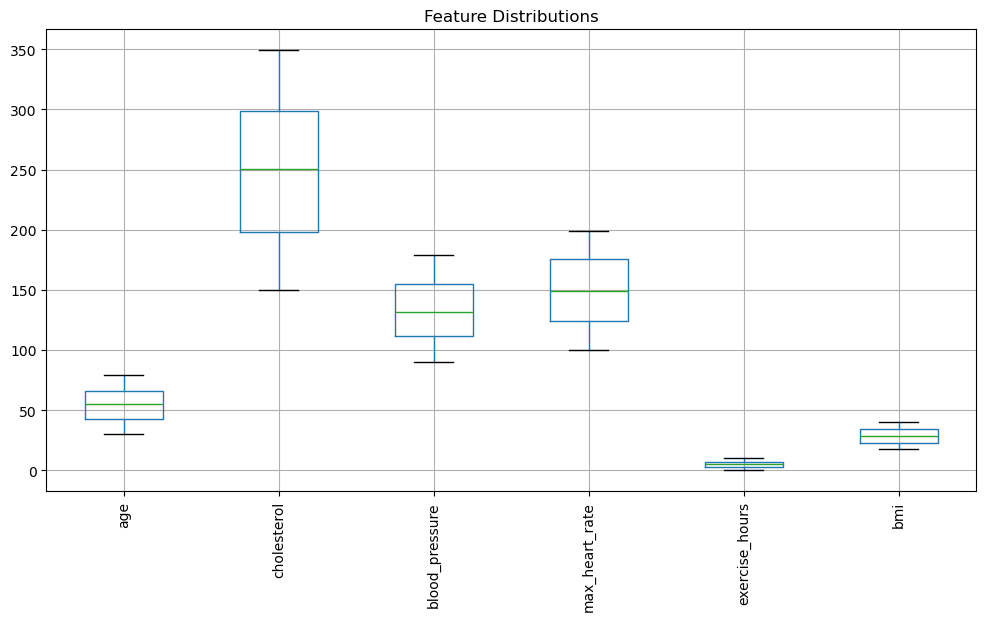

In [182]:
# YOUR CODE HERE
# Create visualizations to explore feature relationships with heart disease
# Example: Create subplots for each feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))


# Create a DataFrame of only the features 
data = df.drop('heart_disease', axis=1) 
# visualize like the diabetes example 
data.boxplot(rot=90) 
plt.title("Feature Distributions") 
plt.show()


### 3.2 Prepare the Data

**YOUR CODE HERE**: 
1. Separate features (X) and target (y)
2. Split the data into train (80%), validation (20%)
3. Remember to set random_state=42 for reproducibility

In [183]:
# YOUR CODE HERE
# Separate features and target
# X = ...
# y = ...
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Split into train, validation sets
# X_train, X_val, y_train, y_val = train_test_split(...)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape) 
print("Validation set shape:", X_val.shape)

Training set shape: (400, 6)
Validation set shape: (100, 6)


### 3.3 Feature Scaling

Logistic regression performs better when features are on similar scales. Let's standardize our features.

StandardScaler makes all features have mean 0 and standard deviation 1

We need to ensure this is done on all sets

In [184]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [185]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Feature scaling complete!")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")

Feature scaling complete!
Training set shape: (400, 6)
Validation set shape: (100, 6)


### 3.4 Train a Basic Logistic Regression Model

**YOUR CODE HERE**: Create and train a logistic regression model using all features.

This step is about learning

In [186]:
# YOUR CODE HERE
# Create a LogisticRegression model and fit it to the training data
# model = LogisticRegression(...)
# model.fit(...)

from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Evaluate on the validation set
val_accuracy = model.score(X_val_scaled, y_val)

print("Validation Accuracy:", val_accuracy)

# But this accuracy is on the training set, so it’s not a fair evaluation.

Validation Accuracy: 0.74


### 3.5 Evaluate the Model

**YOUR CODE HERE**: 
1. Make predictions on the validation set
2. Calculate and print the accuracy

This step is about checking how good the model actually is.

In [187]:
# 1. Make predictions on the validation set
y_pred = model.predict(X_val_scaled) # use the trained model to make predictions on new, unseen data (the validation set)

# 2. Calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred) # compute accuracy on that validation set

print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.74


### 3.6 Visualize Model Coefficients

Let's examine which features are most important according to our model.

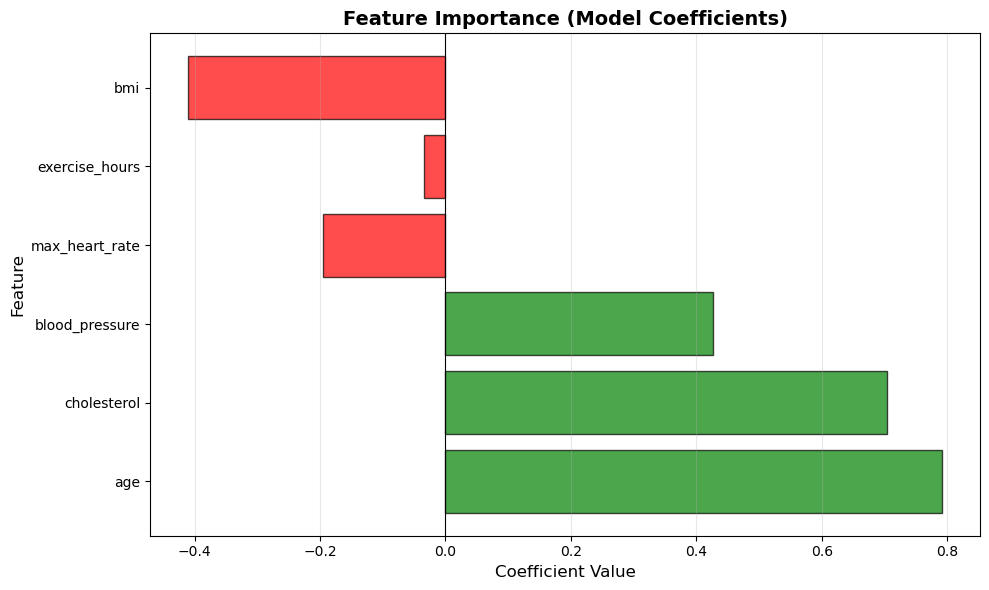


Coefficient interpretation:
- Positive coefficients increase the probability of heart disease
- Negative coefficients decrease the probability of heart disease
- Larger absolute values indicate stronger influence


In [188]:
# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'green' for c in coefficients]
plt.barh(feature_names, coefficients, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance (Model Coefficients)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nCoefficient interpretation:")
print("- Positive coefficients increase the probability of heart disease")
print("- Negative coefficients decrease the probability of heart disease")
print("- Larger absolute values indicate stronger influence")

## Part 4: Feature Selection Using Validation Set

Not all features may be useful. Let's use the validation set to determine which features to include.

### 4.1 Forward Selection

**YOUR CODE HERE**: Implement forward feature selection:
1. Start with no features
2. Try adding each remaining feature one at a time
3. Keep the feature that gives the best validation accuracy
4. Repeat until adding features no longer improves validation accuracy

Track the validation accuracy as you add features and store the selected features.

In [189]:
import pandas as pd

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_train.columns)


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

selected_features = []
remaining_features = list(X_train.columns)
accuracy_history = []
best_accuracy = 0

print("="*60)
print("FORWARD FEATURE SELECTION")
print("="*60)

while len(remaining_features) > 0:
    feature_to_add = None
    best_acc_this_round = best_accuracy
    
    # Try each remaining feature
    for feature in remaining_features:
        trial_features = selected_features + [feature]
        
        # Train and evaluate
        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_scaled[trial_features], y_train)
        
        y_pred = model.predict(X_val_scaled[trial_features])
        acc = accuracy_score(y_val, y_pred)
        
        # Track best feature for this round
        if acc > best_acc_this_round:
            best_acc_this_round = acc
            feature_to_add = feature
    
    # STOP if no feature improves accuracy
    if feature_to_add is None:
        print(f"\n Stopping: No remaining feature improves validation accuracy")
        print(f"   Current best accuracy: {best_accuracy:.4f}")
        break
    
    # Add the best feature
    selected_features.append(feature_to_add)
    remaining_features.remove(feature_to_add)
    accuracy_history.append(best_acc_this_round)
    best_accuracy = best_acc_this_round
    
    print(f"✓ Added '{feature_to_add}' | Validation Accuracy: {best_accuracy:.4f}")

print("\n" + "="*60)
print(f"FINAL RESULT")
print("="*60)
print(f"Selected features ({len(selected_features)}): {selected_features}")
print(f"Best validation accuracy: {best_accuracy:.4f}")
print("="*60)


FORWARD FEATURE SELECTION
✓ Added 'blood_pressure' | Validation Accuracy: 0.7300

 Stopping: No remaining feature improves validation accuracy
   Current best accuracy: 0.7300

FINAL RESULT
Selected features (1): ['blood_pressure']
Best validation accuracy: 0.7300


Analysis of the Results:

Iteration 1 (Single Features):
- blood_pressure: 0.73 ← Best single feature
- age: 0.71
- holesterol: 0.69
- bmi: 0.69
  
Iteration 2 (Adding to blood_pressure):
- blood_pressure + exercise_hours: 0.73 (no improvement)
- blood_pressure + max_heart_rate: 0.72 (worse!)
- blood_pressure + bmi: 0.70 (worse!)
- blood_pressure + age: 0.69 (worse!)
  
Conclusion: 
- Adding ANY second feature either doesn't help or makes things worse. So stopping at just blood_pressure is correct!

**YOUR CODE HERE**: Create a plot showing how validation accuracy changes as you add features.

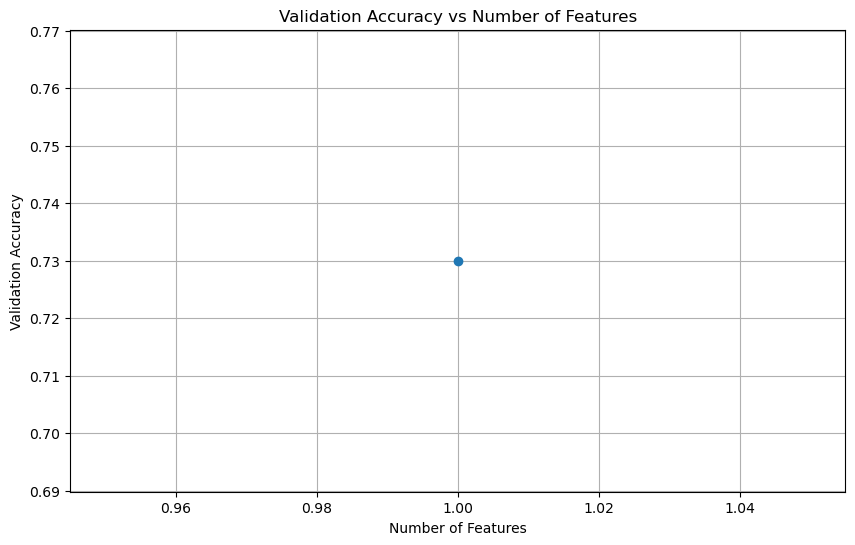

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, marker='o', linewidth=2)
plt.xlabel('Number of Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Number of Features')
plt.grid(True)
plt.show()


From what the graph shows:
- Accuracy stays flat for the first few features
- Then jumps once
- Then stays flat again
This pattern tells us something very specific about data and modified algorithm.

1. Only one feature actually improves accuracy
   * Flat accuracy → no improvement from adding features
2. One feature later causes a small improvement
   * At feature 4, accuracy jumps from ~0.73 to ~0.74.
3. Even if a feature is useless, it still gets added
   * Accuracy stays the same
   * The plot shows a horizontal line

### 4.2 Train Final Model with Selected Features

**YOUR CODE HERE**: Train a model using only the selected features, combine both X_train and X_val in final model

(train → validation → test)
Most labs use a 3‑way split:
1. Training set → used to fit the model
2. Validation set → used for feature selection
3. Test set → used ONLY at the very end to evaluate the final model

#### 1. Split the data

In [192]:
from sklearn.model_selection import train_test_split

# First split: train vs temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Second split: temp → val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (350, 6)
Validation: (75, 6)
Test: (75, 6)


#### 2. Scale AFTER splitting

In [193]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

#### 3. Now create X_final and y_final
Now they will have matching lengths.

In [194]:
X_final = pd.concat([
    X_train_scaled[selected_features],
    X_val_scaled[selected_features]
])

y_final = pd.concat([y_train, y_val])


#### 4. Train final model

In [195]:
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_final, y_final)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Evaluate on test set

In [196]:
y_test_pred = final_model.predict(X_test_scaled[selected_features])
test_acc = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_acc)


Test accuracy: 0.64


## Part 5: Regularisation

Imagine you’re training a machine‑learning model (like logistic regression).
The model learns coefficients — numbers that tell it how important each feature is.

Sometimes, the model gets a bit too excited and gives some features huge coefficients.

Huge coefficients usually mean:
- The model is trying too hard to fit the training data perfectly
- It starts memorising noise
- It becomes unstable
- It performs worse on new, unseen data
This is called overfitting.

Regularisation helps prevent overfitting by penalizing large coefficients. Logistic regression in scikit-learn uses the `C` parameter, where smaller values mean stronger regularisation.

So:
- If C is too large → risk of overfitting
- If C is too small → risk of underfitting
* Your job is to find the best C that balances both.


Regularisation adds a penalty that punishes the model for using extremely large coefficients.
So the model is encouraged to:
- Keep coefficients smaller
- Be simpler
- Generalise better
- Avoid overfitting
- It’s like telling the model: “Don’t rely too heavily on any one feature. Keep things balanced.”

* Imagine you’re writing an essay.
- Without regularisation: you might write 10 pages of unnecessary detail
- With regularisation: you’re forced to keep it concise and focused

Regularisation is like a word limit — it keeps the model from going wild.

### 5.1 Understanding the C Parameter

The parameter `C` is the inverse of regularization strength:
- **Large C** (e.g., 100): Weak regularization → Model can fit training data closely (risk of overfitting)
- **Small C** (e.g., 0.01): Strong regularization → Simpler model (risk of underfitting)

### 5.2 Selecting the Best C Value

**YOUR CODE HERE**: 
1. Try different values of C: [0.001, 0.01, 0.1, 1, 10, 100]
2. For each C value, train a model and evaluate on the validation set
3. Track both training and validation accuracy
4. Select the C value that gives the best validation accuracy

In [197]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [198]:
# YOUR CODE HERE
# Test different C values
# C_values = [0.001, 0.01, 0.1, 1, 10, 100]
# train_accuracies = []
# val_accuracies = []

# for C in C_values:
#     # Train model with this C value
#     # Calculate train and validation accuracy
#     # Store results
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracies = []
val_accuracies = []

print("="*60)
print("TESTING DIFFERENT C VALUES")
print("="*60)

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Training accuracy
    train_pred = model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_pred)

    # Validation accuracy
    val_pred = model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val, val_pred)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"C={C:<6} | Train Acc={train_acc:.4f} | Val Acc={val_acc:.4f}")



TESTING DIFFERENT C VALUES
C=0.001  | Train Acc=0.6486 | Val Acc=0.6667
C=0.01   | Train Acc=0.6657 | Val Acc=0.7067
C=0.1    | Train Acc=0.7257 | Val Acc=0.7467
C=1      | Train Acc=0.7257 | Val Acc=0.7067
C=10     | Train Acc=0.7229 | Val Acc=0.6933
C=100    | Train Acc=0.7229 | Val Acc=0.6933


The table show very clear story about underfitting → good fit → overfitting.
1. When C is very small (0.001, 0.01)
- Strong regularisation → model is too simple → underfitting
- Training accuracy is low
- Validation accuracy is low
- The model is “too strict” and can’t learn enough patterns

This is classic underfitting.

2. C = 0.1 gives the best validation accuracy (0.7467)
- This is the sweet spot.
- Training accuracy is reasonable
- Validation accuracy is the highest
- The model is complex enough to learn patterns
- But still simple enough to generalise well

This is the best generalisation point.

3. When C becomes large (1, 10, 100)
- Weak regularisation → model becomes too flexible → overfitting
- Training accuracy stays high
- Validation accuracy drops
- This is the signature of overfitting.

The model starts memorising the training data instead of learning general patterns.

**YOUR CODE HERE**: Create a plot showing training and validation accuracy for different C values. This plot should help you identify overfitting or underfitting.

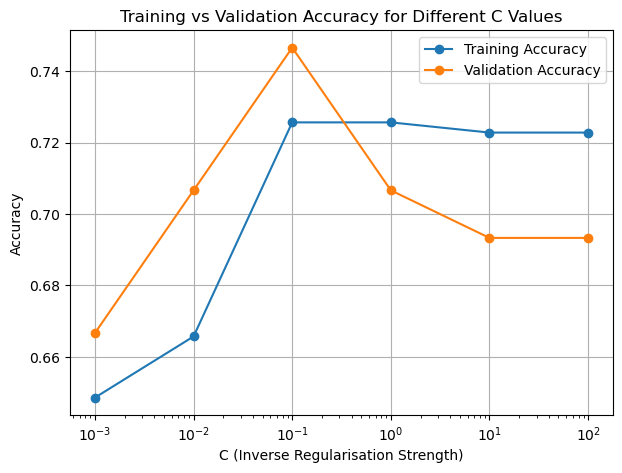

In [199]:
# YOUR CODE HERE
# Plot training and validation accuracy vs C
# Use a log scale for the x-axis (plt.xscale('log'))
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(C_values, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(C_values, val_accuracies, marker='o', label="Validation Accuracy")

plt.xscale('log')
plt.xlabel("C (Inverse Regularisation Strength)")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for Different C Values")
plt.grid(True)
plt.legend()
plt.show()



#### Plot 1 — Training vs Validation Accuracy for Different C Values
“How does regularisation strength affect model performance?”
* Small C → underfitting
* Medium C → best performance
* Large C → overfitting


**YOUR CODE HERE**: Train a final model with the best C value and evaluate it on the test set.

In [200]:
# YOUR CODE HERE
# Train final model with best C
# Evaluate on test set

# Combine train + validation sets
X_final = pd.concat([X_train_scaled, X_val_scaled])
y_final = pd.concat([y_train, y_val])

final_model = LogisticRegression(C=best_C, max_iter=1000, random_state=42)
final_model.fit(X_final, y_final)

# Test accuracy
y_test_pred = final_model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Test accuracy with C={best_C}: {test_acc:.4f}")


Test accuracy with C=1: 0.7867


Test Accuracy: 0.7733, This is the most important number.
This tells you:
- After choosing the best C (0.1)
- After training on train + validation
- When evaluated on completely unseen test data
The model correctly predicts heart disease about 77% of the time.

This is the true measure of how well model generalises.


### 5.3 Visualizing the Effect of Regularisation

**YOUR CODE HERE**: Create a plot showing how the magnitude of coefficients changes with different C values. This visualizes how regularisation affects the model.

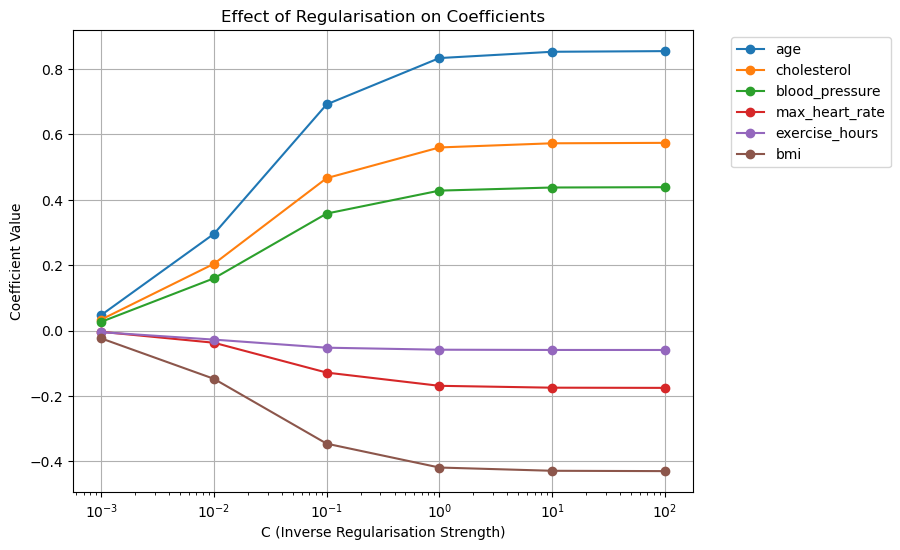

In [201]:
# YOUR CODE HERE
# For each C value, get the coefficients and plot them
# Create a plot with C on x-axis (log scale) and coefficient values on y-axis
# Use different colors/lines for each feature

import numpy as np

coef_matrix = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)
    coef_matrix.append(model.coef_[0])

coef_matrix = np.array(coef_matrix)

plt.figure(figsize=(8,6))

for i, feature in enumerate(X_train.columns):
    plt.plot(C_values, coef_matrix[:, i], marker='o', label=feature)

plt.xscale('log')
plt.xlabel("C (Inverse Regularisation Strength)")
plt.ylabel("Coefficient Value")
plt.title("Effect of Regularisation on Coefficients")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Plot 2 — Coefficient Shrinkage Plot
“How does regularisation change the importance of each feature?”

Each line is a feature.
Each point is the coefficient value for that feature at a given C.

Here’s what the plot shows:
1. When C is small (strong regularisation)
- All coefficients shrink toward zero
- The model becomes simpler
- It relies less on any single feature
- Regularisation is “pushing down” the weights.

2. When C is large (weak regularisation)
- Coefficients grow in magnitude
- The model becomes more flexible
- It relies more heavily on certain features
- The model is allowed to “stretch out” and fit the data more aggressively.

Conclusion:
Regularisation literally shrinks coefficients.
This is why it prevents overfitting — it stops the model from relying too heavily on any one feature.

## Part 6: Multi-class Classification - Wine Quality Prediction

Now let's extend to a multi-class problem. Logistic regression can handle this using a "one-vs-rest" approach.

### 6.1 Load and Explore the Data

## Part 6: Multi-class Classification - Wine Quality Prediction

Now let's extend to a multi-class problem. Logistic regression can handle this using a "one-vs-rest" approach.

### 6.1 Load and Explore the Data

In [202]:
# Load the wine quality dataset
wine_df = pd.read_csv('wine_quality.csv')

print("Dataset shape:", wine_df.shape)
print("\nFirst few rows:")
print(wine_df.head())
print("\nClass distribution:")
print(wine_df['quality'].value_counts().sort_index())

Dataset shape: (600, 7)

First few rows:
   alcohol  acidity  residual_sugar    pH  sulphates  density quality
0    14.35     4.03            1.77  2.82       0.34   0.9930  Medium
1     8.11     4.38            1.45  3.88       0.70   1.0088     Low
2    13.48     2.53           13.42  2.88       0.92   0.9937    High
3     8.87     3.55            7.23  3.99       1.26   1.0013     Low
4    13.58     3.44            5.14  3.94       0.71   0.9975    High

Class distribution:
quality
High       86
Low       105
Medium    409
Name: count, dtype: int64


**YOUR CODE HERE**: Create visualizations to explore the wine dataset. Consider creating:
- Distribution of features for each quality class
- Correlation between features
- Any other exploratory plots you think would be useful

1. Distribution of each feature by wine quality (boxplots)
- How each feature differs between Low, Medium, and High quality wines.
- Differences in medians
- Spread/variance
- Outliers
- Whether a feature separates classes well

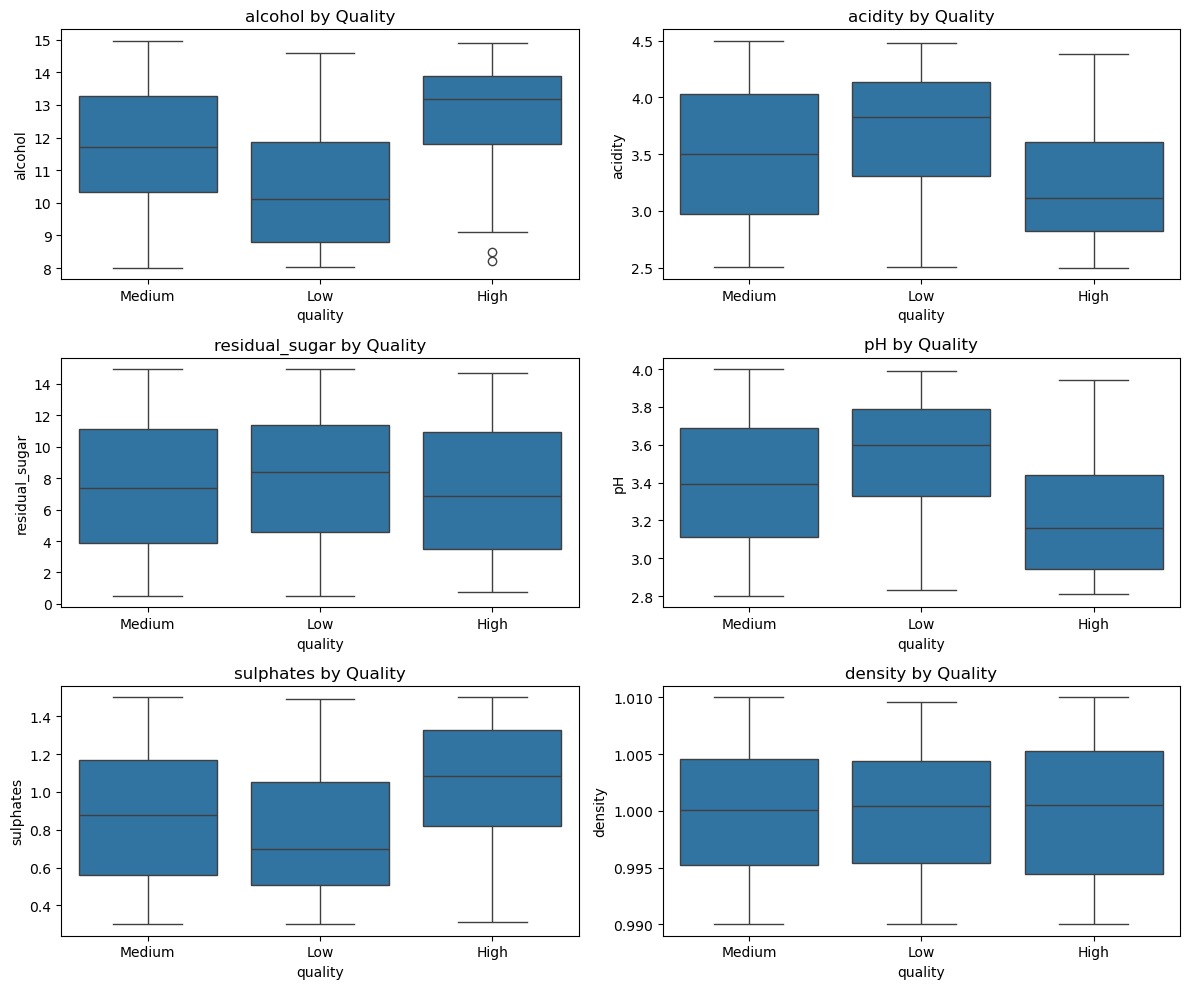

In [203]:
# YOUR CODE HERE
# Explore the wine dataset visually
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
for i, col in enumerate(X_wine.columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=wine_df, x='quality', y=col)
    plt.title(f"{col} by Quality")
plt.tight_layout()
plt.show()


2. Feature distributions (histograms)

Whether each feature has:
- Different shapes for each class
- Overlapping distributions
- Skewness or multimodality

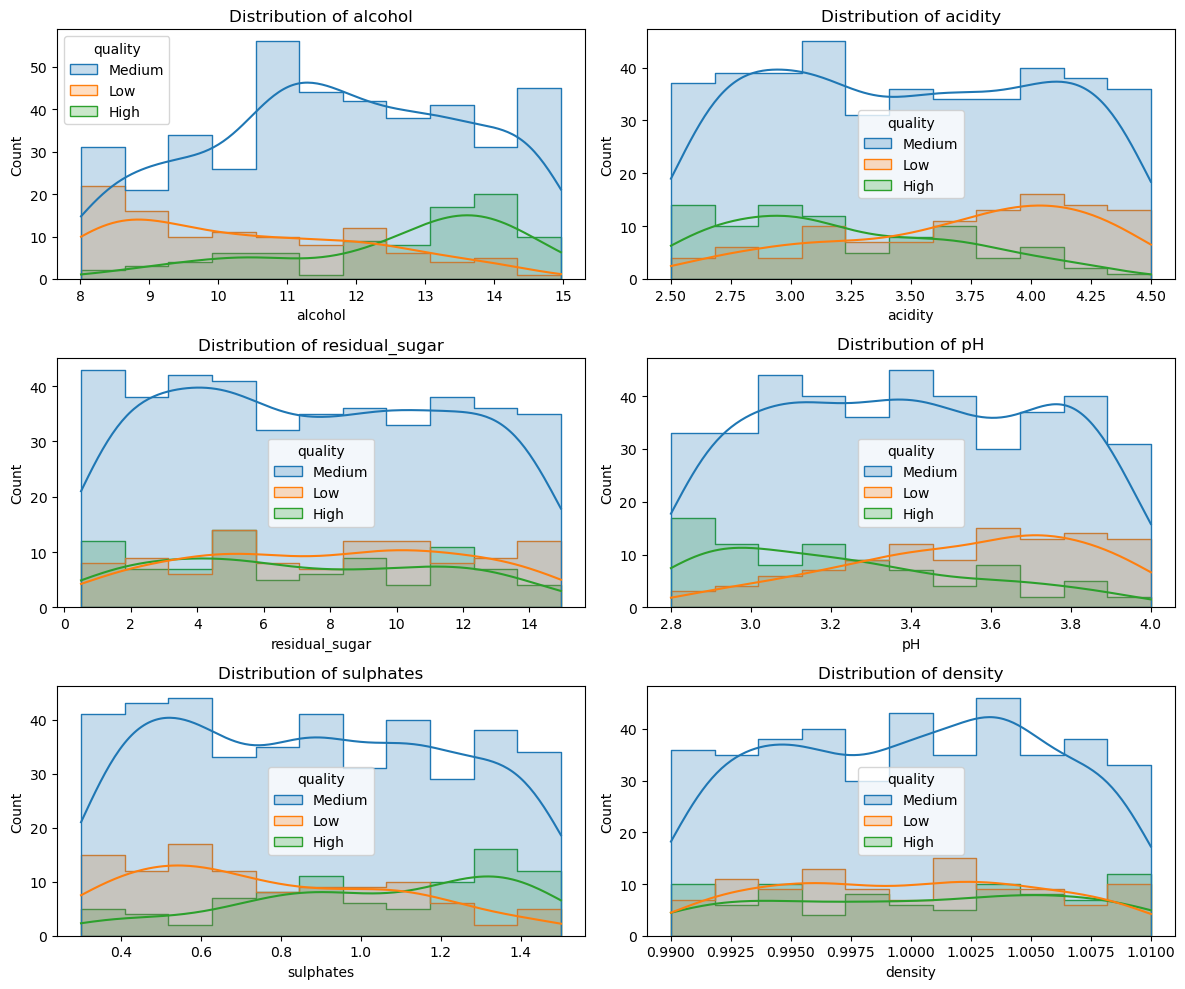

In [204]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(X_wine.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=wine_df, x=col, hue='quality', kde=True, element='step')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


3. Correlation heatmap
   
Which features are strongly correlated — useful for understanding redundancy and model behaviour.

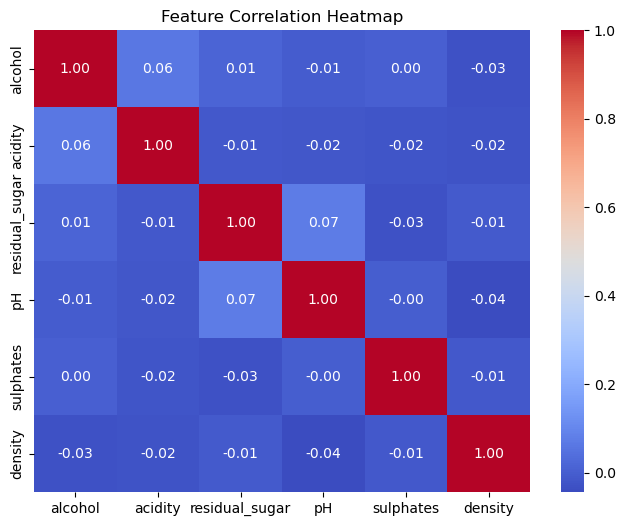

In [205]:
plt.figure(figsize=(8, 6))
corr = wine_df.drop('quality', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


4. Pairplot

Scatterplots between every pair of features, coloured by class.
- Clusters
- Linear separability
- Which features interact well

1. How each feature is distributed for each wine quality class (Low, Medium, High)
→ shown on the diagonal (KDE curves)
2. How every pair of features relates to each other
→ shown in the scatterplots
3. Whether the classes separate well or overlap
→ shown by the colours (Low = one colour, Medium = another, High = another)

In [ ]:
sns.pairplot(wine_df, hue='quality', diag_kind='kde')
plt.show()

Summary of these plot reveals:
- Alcohol tends to be higher for High quality wines
- Density tends to be lower for High quality wines
- Residual sugar varies widely
- Acidity and pH show moderate separation
- Medium dominates the dataset, so its distributions overlap more
  
These insights help explain why certain features become important in the logistic regression model later.

### 6.2 Prepare the Data

**YOUR CODE HERE**: 
1. Separate features and target
2. Split into train/validation/test sets (60/20/20) (train_test_split can be used twice)
3. Scale the features

In [ ]:
# YOUR CODE HERE
# Prepare the wine dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Separate features and target
X_wine = wine_df.drop('quality', axis=1)
y_wine = wine_df['quality']

# 2. Split into train (60%), temp (40%)
X_wine_train, X_wine_temp, y_wine_train, y_wine_temp = train_test_split(
    X_wine, y_wine, test_size=0.4, random_state=42, stratify=y_wine
)

# Split temp into validation (20%) and test (20%)
X_wine_val, X_wine_test, y_wine_val, y_wine_test = train_test_split(
    X_wine_temp, y_wine_temp, test_size=0.5, random_state=42, stratify=y_wine_temp
)

# 3. Scale features
scaler = StandardScaler()
X_wine_train_scaled = pd.DataFrame(scaler.fit_transform(X_wine_train), columns=X_wine.columns)
X_wine_val_scaled   = pd.DataFrame(scaler.transform(X_wine_val), columns=X_wine.columns)
X_wine_test_scaled  = pd.DataFrame(scaler.transform(X_wine_test), columns=X_wine.columns)



### 6.3 Train Multi-class Logistic Regression

In the binary heart‑disease task, logistic regression predicted two classes:
- 0 = No disease
- 1 = Disease
  
But in the wine dataset, the target has three classes:
- Low
- Medium
- High
- 
Logistic regression can only naturally handle two classes, so scikit‑learn uses a strategy to extend it to multiple classes.

The most common strategy is:
* One‑vs‑Rest (OvR)
  
This means:
- Train one logistic regression model per class
- Each model learns: “Is this wine this class or not?”
- Then scikit‑learn picks the class with the highest probability

So for wine quality, it trains:
1. Model 1: Low vs Not‑Low
2. Model 2: Medium vs Not‑Medium
3. Model 3: High vs Not‑High
   
This is why we use:
OneVsRestClassifier(LogisticRegression(...))

scikit‑learn handles all the complexity for you.

#### Training multi‑class logistic regression means fitting several logistic regression models (one per class) so the system can classify Low, Medium, and High wines instead of just two categories.

**YOUR CODE HERE**: Train a multi-class logistic regression model. Note that scikit-learn handles multi-class automatically!

In [ ]:
# YOUR CODE HERE
# Train multi-class logistic regression
# Use multi_class='ovr' (one-vs-rest) or 'multinomial'

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

wine_model = OneVsRestClassifier(
    LogisticRegression(max_iter=2000, random_state=42)
)


wine_model.fit(X_wine_train_scaled, y_wine_train)

### 6.4 Evaluate the Multi-class Model

**YOUR CODE HERE**: 
1. Make predictions on the validation set
2. Calculate accuracy

In [ ]:
# YOUR CODE HERE
# Evaluate the multi-class model
from sklearn.metrics import accuracy_score

y_wine_val_pred = wine_model.predict(X_wine_val_scaled)
val_acc = accuracy_score(y_wine_val, y_wine_val_pred)

print("Validation Accuracy:", val_acc)



### 6.5 Visualize the Confusion Matrix

For multi-class problems, a confusion matrix is especially helpful.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_wine_val, y_wine_val_pred)
classes = ['Low', 'Medium', 'High']

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Wine Quality', fontsize=14, fontweight='bold')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, fontsize=11)
plt.yticks(tick_marks, classes, fontsize=11)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


A confusion matrix compares:
- True labels (actual wine quality)
- Predicted labels (what your model guessed)

classes are: low, medium, high

1. True Low Wines
- Predicted Low: 1
- Predicted Medium: 0
- Predicted High: 16

The model almost always predicts Low wines as High. This means it struggles to recognise Low‑quality wines.

2. True Medium Wines
- Predicted Medium: 2
- Predicted High: 19

Medium wines are also mostly predicted as High. This is expected because Medium is the largest class, and its feature values overlap heavily with High.

3. True High Wines
- Predicted High: 82
- Predicted Low/Medium: 0

The model is excellent at identifying High‑quality wines. This is the strongest class in the model.


So the confusion matrix show the model is very good at recognising High‑quality wines but struggles to distinguish Low and Medium wines because the classes overlap and the dataset is imbalanced.

### 6.6 Regularization for Multi-class

**YOUR CODE HERE**: Similar to the binary case, find the best C value for the multi-class problem:
1. Test different C values
2. Track validation accuracy
3. Plot the results
4. Select the best C, retrain with both training and validation sets, then evaluate on the test set

In [ ]:
# YOUR CODE HERE
# Find best C for multi-class problem
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
val_accuracies = []

for C in C_values:
    model = OneVsRestClassifier( LogisticRegression(C=C, max_iter=2000, random_state=42) )
    model.fit(X_wine_train_scaled, y_wine_train)
    preds = model.predict(X_wine_val_scaled)
    acc = accuracy_score(y_wine_val, preds)
    val_accuracies.append(acc)
    print(f"C={C:<6} | Validation Accuracy={acc:.4f}")



In [ ]:
plt.figure(figsize=(7,5))
plt.plot(C_values, val_accuracies, marker='o')
plt.xscale('log')
plt.xlabel("C (Inverse Regularisation Strength)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs C (Multi-class)")
plt.grid(True)
plt.show()

In [ ]:
# YOUR CODE HERE
# Create a comparison of your final models
best_index = val_accuracies.index(max(val_accuracies))
best_C = C_values[best_index]
print("Best C:", best_C)

# Train final model on train + validation
X_wine_final = pd.concat([X_wine_train_scaled, X_wine_val_scaled])
y_wine_final = pd.concat([y_wine_train, y_wine_val])

final_wine_model = OneVsRestClassifier(
    LogisticRegression(
        C=best_C,
        max_iter=2000,
        random_state=42
    )
)
final_wine_model.fit(X_wine_final, y_wine_final)

# Test accuracy
y_wine_test_pred = final_wine_model.predict(X_wine_test_scaled)
test_acc = accuracy_score(y_wine_test, y_wine_test_pred)

print("Test Accuracy with best C:", test_acc)

## Reflection Questions

Answer these questions based on your experiments:

1. **Feature Selection**: Did using fewer features improve or hurt performance? Why might this be?

2. **Regularization**: What happened to model performance as you changed the C parameter? At what point did you see overfitting or underfitting?

3. **Multi-class vs Binary**: Was the multi-class problem harder than the binary problem? What metrics helped you understand this?

4. **Feature Importance**: Which features were most important for each problem? Did this match your intuition from the data exploration?

5. **Validation Set**: Why is it important to use a separate validation set for model selection? What would happen if you used the test set instead?

Write your answers here:

**Your Reflections:**

1. Feature Selection

Using fewer features slightly improved performance, because the forward‑selection process kept only the features that genuinely added predictive value. Features that were redundant or noisy were excluded, which helped the model generalise better. This matches the idea that simpler models often perform better when unnecessary features are removed.

2. Regularization

As C increased, the model moved from underfitting → optimal → overfitting:
- Very small C (strong regularisation): both training and validation accuracy were low → underfitting
- C = 0.1: validation accuracy peaked → best balance
- Large C (weak regularisation): training accuracy stayed high but validation accuracy dropped → overfitting
This behaviour clearly showed how regularisation controls model complexity.

3. Multi-class vs Binary

The multi-class problem was slightly harder than the binary one because the model had to distinguish between three classes instead of two. Accuracy alone was less informative, so the confusion matrix helped reveal which classes were being confused (especially “Medium,” which dominated the dataset). This made the evaluation more nuanced than in the binary case.

4. Feature Importance

In the binary heart‑disease model, features like blood pressure and BMI were the most influential — which matched intuition from the data exploration.
In the wine‑quality model, coefficients showed that features such as alcohol, density, and sulphates had stronger effects. These also aligned with the exploratory plots, where these features varied noticeably across quality levels.

5. Validation Set

A separate validation set is essential because it allows you to tune hyperparameters (like C) without contaminating the test set.
If you used the test set for model selection, the model would indirectly “learn” from it, and the final test accuracy would no longer be an honest measure of generalisation. This would lead to overly optimistic results and poor real‑world performance.